<a href="https://colab.research.google.com/github/vngeno/HYPOTHYROIDISM-PREDICTION-MODEL/blob/main/HYPOTHYROIDISM_PREDICTION_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DEFINING THE QUESTION

##Specifying the Question

We will work as data scientists for Nairobi Hospital to Build a model that predicts whether or not a patient's symptoms indicate that the patient has hypothyroid.

##Understanding the Context

Opened in 1954, The Nairobi Hospital has excelled in medical expertise and services provision and has deservedly earned recognition throughout East Africa and beyond as an advanced diagnostic, treatment and referral centre. Expansive investment in latest technology and medical equipment has enabled it establish leadership in medical procedures both in Kenya and outside.

The hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients.

##Metric of Success

We will create a model that will allow the company to accurately predict wether or not a patient's symptoms indicate hypothyrodism

##Recording the Experimental Design


Our analysis will take the below flow:

1.)Defining the question

2.)Data Understanding

3.)Exploratory Data Analysis

4.)Modelling

5.)Conclusion 

6.)Challenging the Solution

#DATA PREPARATION

##Reading the Data

In [58]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [59]:
df_hypo = pd.read_csv('/content/hypothyroid.csv')
df_hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [60]:
df_hypo.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [4]:
#We can identify our target(dependent variable) column which is status, the values present are hypothyroid(positive) and negative.
df_hypo['status'].sort_values().unique()

array(['hypothyroid', 'negative'], dtype=object)

##Data Cleaning

In [61]:
#We have no null values
df_hypo.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [62]:
df_hypo.duplicated().nunique()

2

In [63]:
#We'll now check for the particular duplicate rows to see if we can drop or keep them. 
#I decided to keep the duplicate records 
duplicateRows = df_hypo[df_hypo.duplicated()]
duplicateRows

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.10,y,107,y,1.05,y,103,n,?
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,?,y,0.80,y,88,y,1.02,y,86,n,?
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.80,y,126,y,1.18,y,107,n,?
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.90,y,82,y,0.80,y,103,n,?


In [64]:
#Checking the particular columns
df_hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [65]:
df_hypo.replace(("?", "0"), inplace=True)

status                       None
age                          None
sex                          None
on_thyroxine                 None
query_on_thyroxine           None
on_antithyroid_medication    None
thyroid_surgery              None
query_hypothyroid            None
query_hyperthyroid           None
pregnant                     None
sick                         None
tumor                        None
lithium                      None
goitre                       None
TSH_measured                 None
TSH                          None
T3_measured                  None
T3                           None
TT4_measured                 None
TT4                          None
T4U_measured                 None
T4U                          None
FTI_measured                 None
FTI                          None
TBG_measured                 None
TBG                          None
dtype: object

In [66]:
#Dropping the '?' entry
df_hypo.drop(df_hypo.index[df_hypo["TBG"] == '?'], inplace = True)

TypeError: ignored

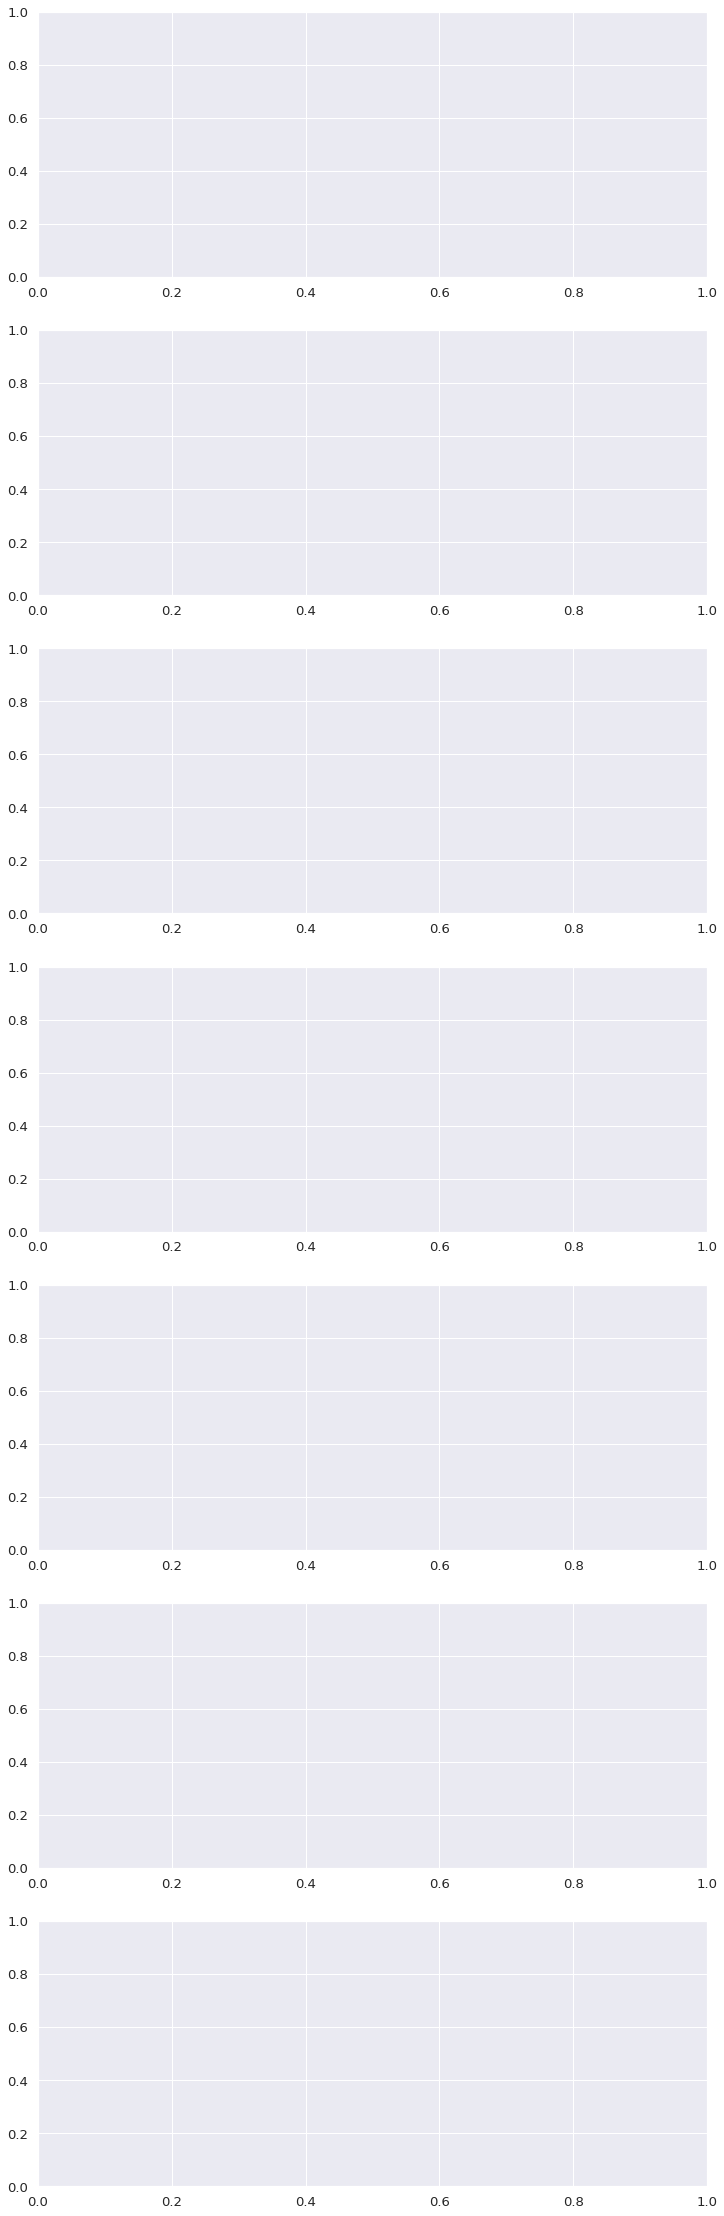

In [78]:
#Loop method to check for outliers visually using a boxplot
col_names = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI','TBG']

fig, ax = plt.subplots(len(col_names), figsize= (12,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=df_hypo[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

#EXPLORATORY DATA ANALYSIS

##Univariate Analysis

In [11]:
#The summary statistics are as follows
df_hypo.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139,3139
unique,2,92,2,2,2,2,2,2,2,2,2,2,2,2,2,227,2,68,2,266,2,157,2,276,2,51
top,negative,59,F,f,f,f,f,f,f,f,f,f,f,f,y,0.90,y,2.10,y,90,y,0.98,y,98,n,23
freq,3012,83,2216,2680,3084,3097,3037,2901,2897,3076,3040,3099,3137,3040,2671,144,2448,187,2890,50,2891,90,2892,63,2879,282


In [12]:
df_hypo.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
24,hypothyroid,40,F,f,f,f,f,f,f,f,f,f,f,f,y,70,y,0.40,y,3.90,y,0.83,y,5,y,28
25,hypothyroid,84,F,f,f,f,f,f,f,f,f,f,f,f,y,34,y,0.70,y,52,y,1.11,y,47,n,28
26,hypothyroid,84,M,f,f,f,t,f,f,f,f,f,f,f,y,53,y,1,y,32,y,0.78,y,41,n,28
27,hypothyroid,83,F,f,f,f,f,f,f,f,f,f,f,f,y,9.40,y,0.60,y,30,y,1.02,y,29,n,28
28,hypothyroid,63,F,f,f,f,f,f,f,f,f,f,f,f,y,126,y,1.30,y,39,y,1.08,y,37,n,28


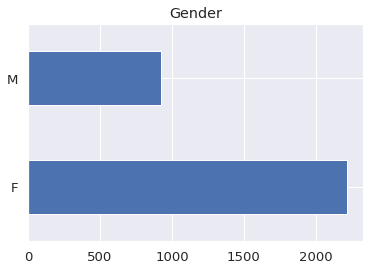

In [13]:
#There are more females with hypothyrodism than males
df_hypo['sex'].value_counts().plot(kind='barh')
plt.title('Gender');

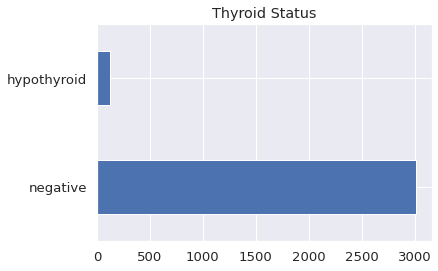

In [14]:
#There are more negative test results of hypothyroidsm than positive results
df_hypo['status'].value_counts().plot(kind='barh')
plt.title('Thyroid Status');

In [44]:
#Skewness
#Positive values indicate that the tail of the data is right-skewed. The skew of the year seems negligible and could be symmetrical/non-skewed.
print('Skewness of age: ' +str(df_hypo['age'].skew()))
print('Skewness of TSH: ' +str(df_hypo['TSH'].skew()))
print('Skewness of FTI ' +str(df_hypo['FTI'].skew()))

Skewness of age: -0.1579382923275184
Skewness of TSH: 10.245546063478143
Skewness of FTI 5.20623008838342


In [45]:
#Kurtosis
#The TSH and FTI columns positive kurtosis. Positive values of kurtosis indicate that the distribution is peaked and possess thick tails. Leptokurtic distributions have positive kurtosis values.
#A leptokurtic distribution has a higher peak and taller (i.e. fatter and heavy) tails than a normal distribution.

#Negative values of kurtosis as seen in the age column indicate that a distribution is flat and has thin tails. Platykurtic distributions have negative kurtosis values.
#A platykurtic distribution is flatter (less peaked) when compared with the normal distribution, with fewer values in its shorter (i.e. lighter and thinner) tails.
print('Kurtosis of age: ' +str(df_hypo['age'].kurt()))
print('Kurtosis of TSH: ' +str(df_hypo['TSH'].kurt()))
print('Kurtosis of FTI ' +str(df_hypo['FTI'].kurt()))

Kurtosis of age: -0.9808323425209973
Kurtosis of TSH: 165.41504108351646
Kurtosis of FTI 46.333559966715015


##Bivariate Analysis

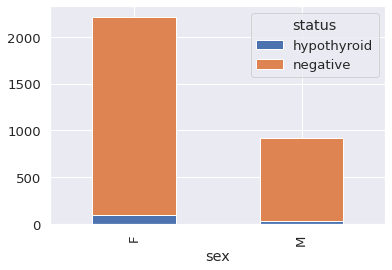

In [67]:
df_hypo.groupby('sex')['status'].value_counts().unstack().plot.bar(stacked=True);

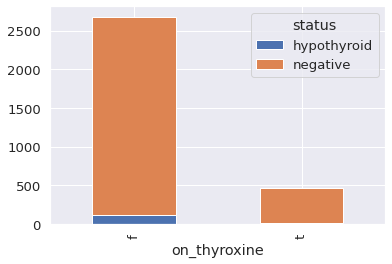

In [72]:
df_hypo.groupby('on_thyroxine')['status'].value_counts().unstack().plot.bar(stacked=True)

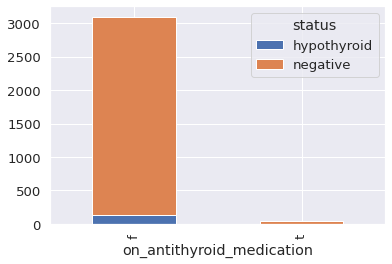

In [73]:
df_hypo.groupby('on_antithyroid_medication')['status'].value_counts().unstack().plot.bar(stacked=True)

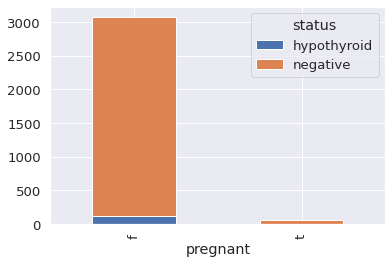

In [74]:
df_hypo.groupby('pregnant')['status'].value_counts().unstack().plot.bar(stacked=True)

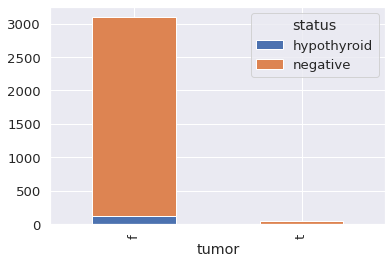

In [75]:
df_hypo.groupby('tumor')['status'].value_counts().unstack().plot.bar(stacked=True)

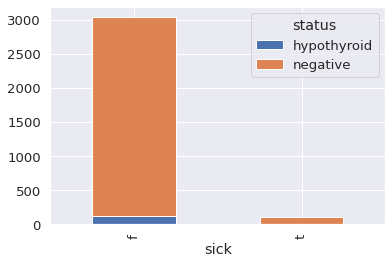

In [76]:
df_hypo.groupby('sick')['status'].value_counts().unstack().plot.bar(stacked=True)

**Bivariate Analysis Interpretation**

Females are more susceptible to thyroidism than males and more investigation needs to be done based on this

More people who are not pregnant have hypothyroidism, more people didn't have a tumor who tested positive for hypothyroidsm and also there were more people who were not suffereing from other diseases and tested positive

##Multivariate Analysis

###Linear Discriminant Analysis

In [15]:
df_hypo.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
24,hypothyroid,40,F,f,f,f,f,f,f,f,f,f,f,f,y,70,y,0.40,y,3.90,y,0.83,y,5,y,28
25,hypothyroid,84,F,f,f,f,f,f,f,f,f,f,f,f,y,34,y,0.70,y,52,y,1.11,y,47,n,28


In [16]:
df_hypo.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [17]:
#Preparing the data for encoding
df_enc = df_hypo.copy(deep=True)
df_enc['status'] = df_enc['status'].astype('category')
df_enc['sex'] = df_enc['sex'].astype('category')
df_enc['on_thyroxine'] = df_enc['on_thyroxine'].astype('category')
df_enc['query_on_thyroxine'] = df_enc['query_on_thyroxine'].astype('category')
df_enc['on_antithyroid_medication'] = df_enc['on_antithyroid_medication'].astype('category')
df_enc['thyroid_surgery'] = df_enc['thyroid_surgery'].astype('category')
df_enc['query_hypothyroid'] = df_enc['query_hypothyroid'].astype('category')
df_enc['sick'] = df_enc['sick'].astype('category')
df_enc['tumor'] = df_enc['tumor'].astype('category')
df_enc['lithium'] = df_enc['lithium'].astype('category')
df_enc['goitre'] = df_enc['goitre'].astype('category')
df_enc['TSH_measured'] = df_enc['TSH_measured'].astype('category')
df_enc['T3_measured'] = df_enc['T3_measured'].astype('category')
df_enc['TT4_measured'] = df_enc['TT4_measured'].astype('category')
df_enc['T4U_measured'] = df_enc['T4U_measured'].astype('category')
df_enc['FTI_measured'] = df_enc['FTI_measured'].astype('category')
df_enc['TBG_measured'] = df_enc['TBG_measured'].astype('category')
df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3139 entries, 24 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3139 non-null   category
 1   age                        3139 non-null   object  
 2   sex                        3139 non-null   category
 3   on_thyroxine               3139 non-null   category
 4   query_on_thyroxine         3139 non-null   category
 5   on_antithyroid_medication  3139 non-null   category
 6   thyroid_surgery            3139 non-null   category
 7   query_hypothyroid          3139 non-null   category
 8   query_hyperthyroid         3139 non-null   object  
 9   pregnant                   3139 non-null   object  
 10  sick                       3139 non-null   category
 11  tumor                      3139 non-null   category
 12  lithium                    3139 non-null   category
 13  goitre                     3139 

In [18]:
# #We'll use one hot encoding 
# #With One-Hot Encoding, the binary vector arrays representation allows a machine learning algorithm to leverage the information contained in a category value without the confusion caused by ordinality
# df_enc = df_hypo.copy(deep=True)
# df_enc = pd.get_dummies(df_hypo, columns=['status', 'sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','goitre','lithium','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured'],drop_first=True)
# df_enc

In [19]:
df_enc.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [20]:
# #Rearranging the columns to hev status as the first
# df_enc = df_enc[['status_negative','age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG','sex_M', 'on_thyroxine_t', 'query_on_thyroxine_t',
#        'on_antithyroid_medication_t', 'thyroid_surgery_t',
#        'query_hypothyroid_t', 'query_hyperthyroid_t', 'pregnant_t', 'sick_t',
#        'tumor_t', 'goitre_t', 'lithium_t', 'TSH_measured_y', 'T3_measured_y',
#        'TT4_measured_y', 'T4U_measured_y', 'FTI_measured_y', 'TBG_measured_y']]
# df_enc       

In [21]:
#Using label encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df_enc = df_hypo.copy(deep=True)
df_enc['status']=labelencoder.fit_transform(df_enc['status'])
df_enc['sex']=labelencoder.fit_transform(df_enc['sex'])
df_enc['on_thyroxine']=labelencoder.fit_transform(df_enc['on_thyroxine'])
df_enc['query_on_thyroxine']=labelencoder.fit_transform(df_enc['query_on_thyroxine'])
df_enc['on_antithyroid_medication']=labelencoder.fit_transform(df_enc['on_antithyroid_medication'])
df_enc['thyroid_surgery']=labelencoder.fit_transform(df_enc['thyroid_surgery'])
df_enc['query_hypothyroid']=labelencoder.fit_transform(df_enc['query_hypothyroid'])
df_enc['pregnant']=labelencoder.fit_transform(df_enc['pregnant'])
df_enc['sick']=labelencoder.fit_transform(df_enc['sick'])
df_enc['tumor']=labelencoder.fit_transform(df_enc['tumor'])
df_enc['lithium']=labelencoder.fit_transform(df_enc['lithium'])
df_enc['goitre']=labelencoder.fit_transform(df_enc['goitre'])
df_enc['query_hyperthyroid']=labelencoder.fit_transform(df_enc['query_hyperthyroid'])
df_enc['TSH_measured']=labelencoder.fit_transform(df_enc['TSH_measured'])
df_enc['T3_measured']=labelencoder.fit_transform(df_enc['T3_measured'])
df_enc['TT4_measured']=labelencoder.fit_transform(df_enc['TT4_measured'])
df_enc['T4U_measured']=labelencoder.fit_transform(df_enc['T4U_measured'])
df_enc['FTI_measured']=labelencoder.fit_transform(df_enc['FTI_measured'])
df_enc['TBG_measured']=labelencoder.fit_transform(df_enc['TBG_measured'])
df_enc.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
24,0,40,0,0,0,0,0,0,0,0,0,0,0,0,1,70,1,0.40,1,3.90,1,0.83,1,5,1,28
25,0,84,0,0,0,0,0,0,0,0,0,0,0,0,1,34,1,0.70,1,52,1,1.11,1,47,0,28
26,0,84,1,0,0,0,1,0,0,0,0,0,0,0,1,53,1,1,1,32,1,0.78,1,41,0,28
27,0,83,0,0,0,0,0,0,0,0,0,0,0,0,1,9.40,1,0.60,1,30,1,1.02,1,29,0,28
28,0,63,0,0,0,0,0,0,0,0,0,0,0,0,1,126,1,1.30,1,39,1,1.08,1,37,0,28


In [22]:
df_enc.shape

(3139, 26)

In [23]:

#Separating the target label (price) from the other features

feat = df_enc.iloc[:,1:27]
status_label = df_enc['status']

In [24]:

#Subject our frame to LDA model

#import LDA method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#creating an instance of LDA

lda = LDA()

lda_ = lda.fit(feat, status_label)
lda_feat = lda_.transform(feat)

#Displaying coefficients of the reducted columns
lda_.coef_

array([[ 7.25533904e-04,  1.25680359e-01, -8.03153326e-02,
         9.36571941e-01,  2.15308068e-01, -1.07006135e+00,
        -3.59724964e-01, -8.07515888e-01,  1.33281059e+00,
         7.79701198e-01,  1.32035694e+00,  3.57399946e+00,
        -1.19220651e+00, -1.28563512e+00, -1.69994754e-01,
        -1.47896907e-01,  1.25502402e-01, -7.21393574e-01,
         5.97852457e-02,  1.91674559e+00, -6.60999969e+00,
        -8.28712119e+00, -1.35821816e-02, -6.95439031e+00,
        -1.24957377e-02]])

In [25]:
new_df = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
new_df.sort_values(0, ascending=False)

,0
lithium,3.573999
T4U_measured,1.916746
pregnant,1.332811
tumor,1.320357
query_on_thyroxine,0.936572
sick,0.779701
on_antithyroid_medication,0.215308
sex,0.125680
T3,0.125502
TT4,0.059785


**LDA Interpretation**

I decided to use label encoding and not one hot encoding since one hot encoding creates and extra column with a new column name of course related to the original. Label encoding is much more straight forward and gives the results clearly without creating an extra column

After LDA, we see that lithium is the top variable that indicates the patient has hypothyroid as they bear much weight with a coeficient of 3. We would recommend for the hospital to choose to testing for lithium first in a patient to determine if he/she has hypothyroid. Besisdes lithium, wether T4U has been measured also carries weight in determing if a patient has hypothyroidsm. T4U(thyroxine utilization rate)


#MODELING

##Decision Trees

###Random Forests

In [26]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if a patient has hypothyroidsm, so let's use status column as our Y 
y = df_enc['status'].values


test_features = df_enc.columns.to_list()
test_features.remove('status')

# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X = df_enc[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = forest.predict(X_test)


comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()


,Actual,Predicted
count,628.000000,628.000000
mean,0.963376,0.960008
std,0.187987,0.182470
min,0.000000,0.009636
25%,1.000000,0.999874
50%,1.000000,0.999874
75%,1.000000,0.999874
max,1.000000,1.000000


In [27]:
#Let's assess how well our random forest is doing.
from sklearn import metrics

# And now we assess the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.00780658460345754
Mean Squared Error: 0.0026559298084006884
Root Mean Squared Error: 0.05153571391181739


Our RMSE is small which shows the model's performance is good

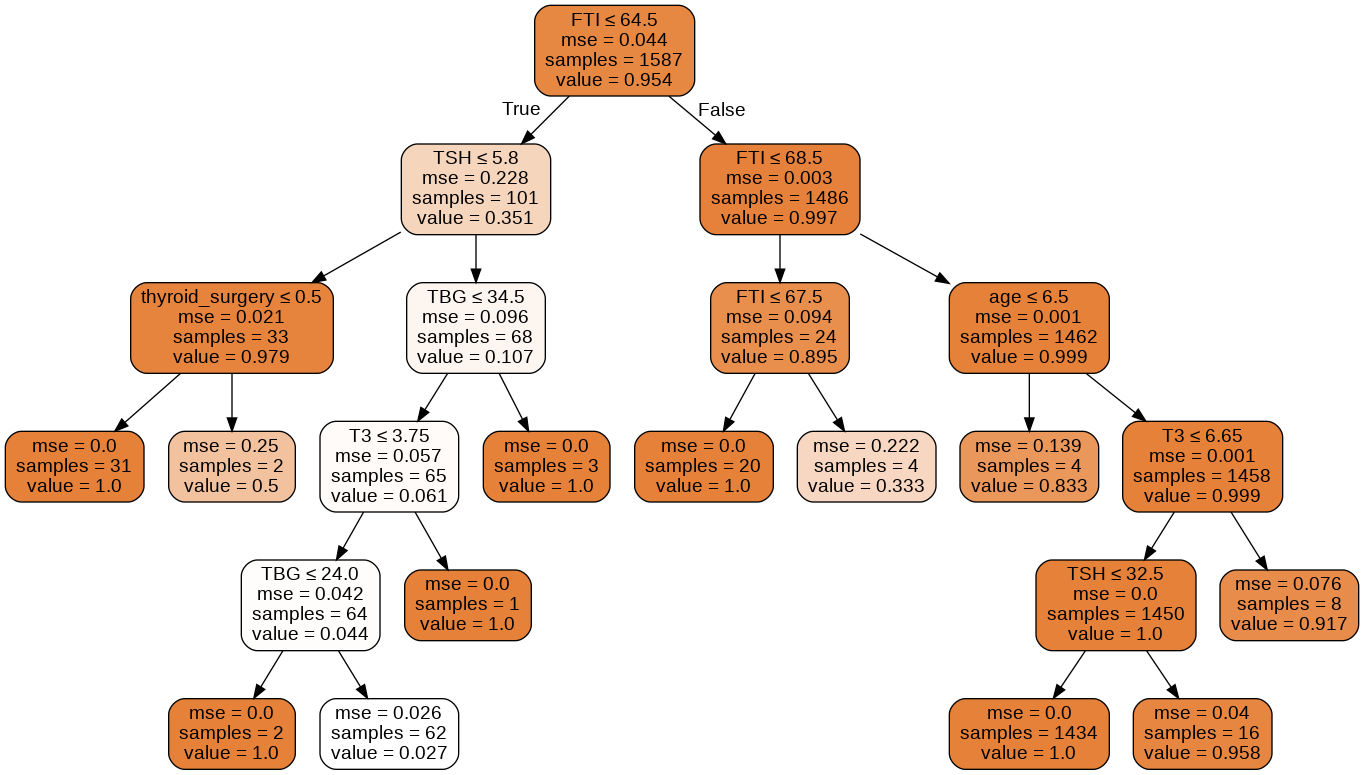

In [28]:
#Creating a random forest with 50 trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidsm_forest.png')
Image(graph.create_png())


In [29]:
#We will now visualize feature importance as our random forest model has a very strong sense of which features matter most.

# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.25), ('T3_measured', 0.0), ('T3', 0.02), ('TT4_measured', 0.0), ('TT4', 0.0), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.66), ('TBG_measured', 0.0), ('TBG', 0.07)]

Variable: FTI                  Importance: 0.66
Variable: TSH                  Importance: 0.25
Variable: TBG                  Importance: 0.07
Variable: T3                   Importance: 0.02
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: q

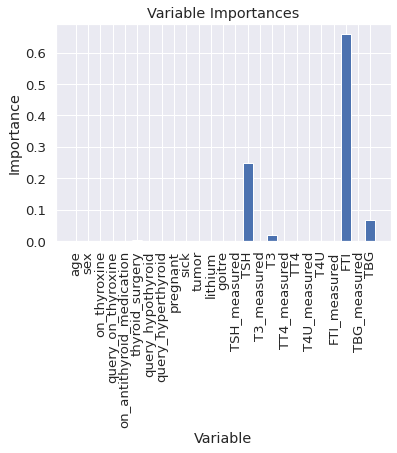

In [30]:
# Visualization of the above output 
# Import matplotlib for plotting and use magic command for Jupyter Notebooks

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

**Random Forest Recommendation**

From our model to predict hypothyroidsm in patients, we need four variables or features FTI, TSH, TBG and T3

###Gradient Boosted Tree

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
target_number_of_trees = 300

gbr = GradientBoostingRegressor(n_estimators=target_number_of_trees, learning_rate=0.1, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X)


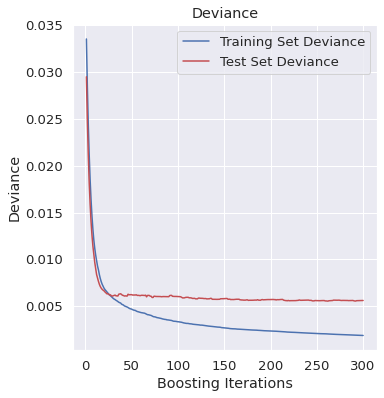

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
# the train_score_ variable is a list that records the deviance of the model for any given number of trees. gbr.train_score_[0] is the deviance when we only had the initial tree, whereas
# gbr.train_score_[100] is the deviance by the time we have created 100 trees.
# This is plotted against a simple list that goes from 1 to our target number of trees.
plt.plot(np.arange(target_number_of_trees) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')

# We also want to see how well we could handle the test set each time. 
# The staged_predict function takes an X, and returns a list of the predictions for X at various stages of the training: What did we pick when we had 1 tree, 2 trees, 3 trees, etc.
# We will compare our predictions at each stage against the test data, and compute the deviance
test_score = np.zeros((target_number_of_trees,), dtype=np.float64) # this is just a list of 0s

for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    # For each prediction, compute the loss function comparing the actual data with your prediction at a given stage of training
    test_score[i] = gbr.loss_(y_test, y_pred)
    
plt.plot(np.arange(target_number_of_trees) + 1, test_score, 'r-',
         label='Test Set Deviance')

plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.show()


In [33]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.01898410432222492
Mean Squared Error: 0.00561047360225564
Root Mean Squared Error: 0.07490309474418023


Gradient boosting involves three elements:

A loss function to be optimized.

A weak learner to make predictions.

An additive model to add weak learners to minimize the loss function.

There's a clear improvement on Mean Absolute error and RMSE

##Support Vector Machine

In [34]:
# Specify the input for the model
hypo_features = df_hypo[['FTI','TSH']].to_numpy()

# Convert the data type for 'Type' column from object to category
df_hypo['status'] = df_hypo['status'].astype('category')

# Convert each value in the 'status' column into a number. This will be our target column
status_label =df_hypo['status'].cat.codes
print(status_label)

# Fit the model
model = SVC(kernel= 'linear')
clf_model = model.fit(hypo_features, status_label)

24      0
25      0
26      0
27      0
28      0
       ..
3158    1
3159    1
3160    1
3161    1
3162    1
Length: 3139, dtype: int8


In [35]:
# FUnction that predict whether a patient is hypothyroid
def hypothyroidsm(FTI, TSH):
    if(model.predict([[FTI, TSH]]))==0:
        print("You're not hypothyroid")
    elif(model.predict([[FTI,TSH]]))==1:
        print("You're hypothyroid!")

# Predict if 60 level of FTI and 30 level on TSH
hypothyroidsm(60, 30)

You're hypothyroid!


In [36]:
#Preparing the variables
hypo = df_enc[['FTI','TSH']]
y = df_enc['status']

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(hypo)
X = pca.transform(hypo)
X.shape

(3139, 2)

In [37]:
# Convert the data type for 'status' column from object to category
y = y.astype('category')

# Convert each value in the 'status' column into a number. This will be our target column
y =y.cat.codes

#  Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Polymomial function

In [ ]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

**Optimization: Parameter tuning**

For non-linear kernel, we use the gamma parameter to improve the perfomance.A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting.

In [ ]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [ ]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

###Radial basis function (rbf)

In [38]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [40]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9904458598726115
[[ 20   3]
 [  3 602]]


The RBF model achieved 99% accuracy hence it's a perfect fit and doesn't show any overfitting or underfitting

I was unable to get results for the polynomial model as the cell ran indefinitely.

#CONCLUSION

The RBF model was quite successful as it yielded an accuracy score of 99%. I was unable to get results for the polynomial model as the cell ran indefinitely.

The Random Forest model was fairly successful as the RMSE was quite small, upon boosting using gradient boosting the model improved

I was unable to detect and remove outliers during data cleaning because of errors and decided to work with them.

#CHALLENGING THE SOLUTION


The data we worked with had a few challenges as I was unable to fit the polynomial model. It also had a lot of '?' and decided to replace and drop them. The value of '?' needs to be investigated further.



